<a href="https://colab.research.google.com/github/adiiaryasutaa/learning-about-ai/blob/main/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip flower_data.zip
!unzip '/content/drive/MyDrive/Colab Notebooks/Dataset/flower_data.zip' -d Dataset

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Kon/flower_data/daisy/18582579815_4c6637e9ff_m.jpg  
  inflating: Dataset Kon/__MACOSX/flower_data/daisy/._18582579815_4c6637e9ff_m.jpg  
  inflating: Dataset Kon/flower_data/daisy/5434901893_4550be3f84_m.jpg  
  inflating: Dataset Kon/__MACOSX/flower_data/daisy/._5434901893_4550be3f84_m.jpg  
  inflating: Dataset Kon/flower_data/daisy/10172567486_2748826a8b.jpg  
  inflating: Dataset Kon/__MACOSX/flower_data/daisy/._10172567486_2748826a8b.jpg  
  inflating: Dataset Kon/flower_data/daisy/8671824531_64b816949e_m.jpg  
  inflating: Dataset Kon/__MACOSX/flower_data/daisy/._8671824531_64b816949e_m.jpg  
  inflating: Dataset Kon/flower_data/daisy/12193032636_b50ae7db35_n.jpg  
  inflating: Dataset Kon/__MACOSX/flower_data/daisy/._12193032636_b50ae7db35_n.jpg  
  inflating: Dataset Kon/flower_data/daisy/20619292635_9857a12d54.jpg  
  inflating: Dataset Kon/__MACOSX/flower_data/daisy/._20619292635_9857a12d54.jpg  
  infla

In [ ]:
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Dataset/flower_data',
    image_size = (180, 180),
    batch_size = 32
)

Found 2746 files belonging to 5 classes.


In [ ]:
count = round(len(dataset) * 0.7)

train_dataset = dataset.take(count)
test_dataset = dataset.skip(count)

In [ ]:
train_data = train_dataset.map(lambda x, y: (x / 255, y))
test_data = test_dataset.map(lambda x, y: (x / 255, y))

In [ ]:
# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_data, epochs=128, validation_data=test_data)

Epoch 1/128
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.2769 - loss: 1.8280 - val_accuracy: 0.5169 - val_loss: 1.1507
Epoch 2/128
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5203 - loss: 1.1948 - val_accuracy: 0.5642 - val_loss: 1.0583
Epoch 3/128
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.5805 - loss: 1.0529 - val_accuracy: 0.6356 - val_loss: 0.9448
Epoch 4/128
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.6547 - loss: 0.8797 - val_accuracy: 0.6477 - val_loss: 0.8890
Epoch 5/128
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.7204 - loss: 0.7353 - val_accuracy: 0.6356 - val_loss: 1.1094
Epoch 6/128
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.7517 - loss: 0.6480 - val_accuracy: 0.6513 - val_loss: 0.9171
Epoch 7/128
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8329 - loss: 0.4797 - val_accuracy: 0.6792 - val_loss: 0.8505
Epoch 8/128
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.8481 - loss: 0.4180 - val_accu

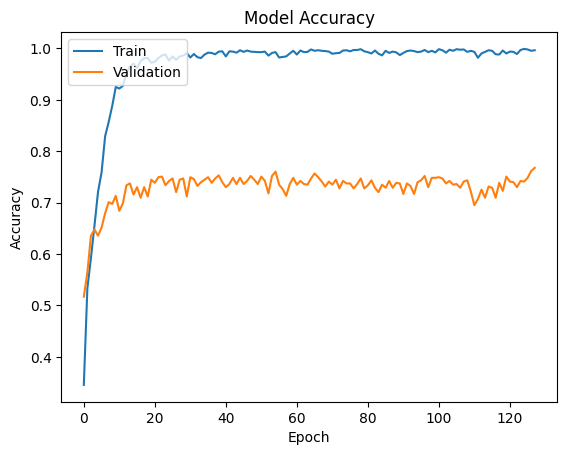

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

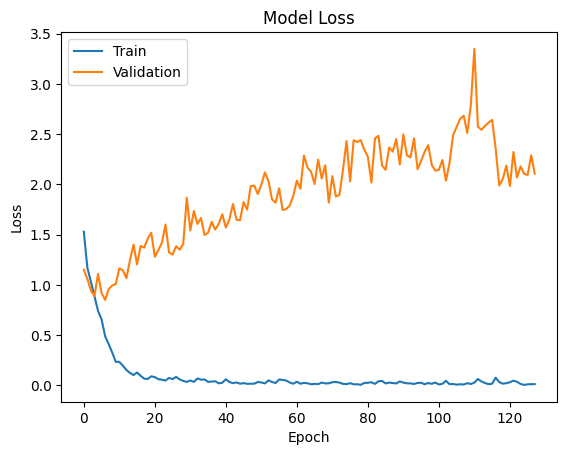

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')